<a href="https://colab.research.google.com/github/SmartDogy/ML_Playground/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/students_cgpa_iq_clusters.csv')

In [3]:
dataset.head()

,CGPA,IQ
0,6.649014,91.806978
1,6.458521,97.690183
2,6.694307,89.820870
3,6.956909,97.823218
4,6.429754,76.901274


Text(0, 0.5, 'IQ')

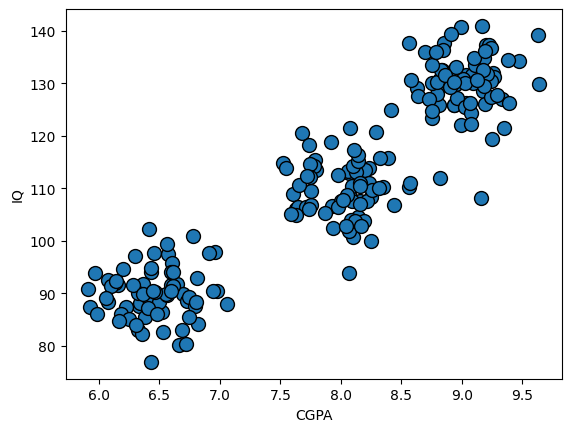

In [4]:
plt.scatter(dataset['CGPA'], dataset['IQ'], edgecolors='black', s=100)
plt.xlabel('CGPA')
plt.ylabel('IQ')

In [5]:
wcs = []

for i in range(1, 11):
  clf = KMeans(n_clusters=i)
  clf.fit(dataset)
  wcs.append(clf.inertia_)

In [6]:
wcs

[63633.91219870748,
 16151.060827761641,
 4709.021849384528,
 3758.211774018633,
 2476.602824897742,
 1720.3759052814667,
 1295.0570398040595,
 1172.8832290364344,
 768.8454167198872,
 603.9724876560701]

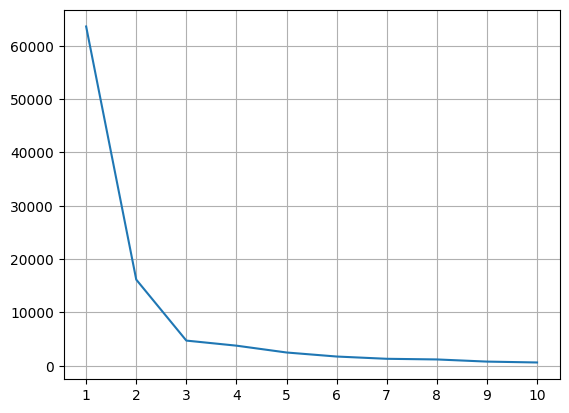

In [7]:
plt.plot(range(1,11), wcs)
plt.xticks(ticks=range(1,11,1))
plt.grid()

In [8]:
X = dataset.iloc[:,:].values

clf_main = KMeans(n_clusters=3)
y_mean = clf_main.fit_predict(X)

In [9]:
X[y_mean == 0,0]

array([8.07514786, 8.28901284, 7.67873225, 9.0340552 , 9.1986392 ,
       9.47580504, 8.62865535, 9.63991001, 8.41437366, 8.95446447,
       9.17649516, 9.08429756, 8.81319014, 8.93756332, 8.85209972,
       8.82319057, 9.25488063, 9.10710465, 8.79212712, 9.26987996,
       9.09218986, 9.24385864, 9.18888865, 8.7513015 , 8.83194569,
       9.22418808, 9.18311108, 8.99372952, 9.03519821, 9.38329947,
       8.82252858, 9.16412921, 8.9393422 , 8.93469564, 9.32963306,
       9.24405289, 9.39164364, 9.00630115, 9.20458589, 8.90691997,
       9.09724991, 8.96095708, 9.02909879, 9.17854711, 8.7545338 ,
       9.62771618, 8.69819479, 8.63574342, 9.34743326, 9.23749881,
       9.18723595, 9.18850365, 8.99632597, 8.73082369, 9.02274137,
       8.79685149, 9.29253592, 8.95588279, 8.75235084, 8.90358425,
       9.12387944, 8.83088263, 8.75333388, 9.07310616, 9.07348997,
       8.84791705, 8.85868851, 9.06961498, 8.5655747 , 8.57776087,
       8.78446673, 8.93596585])

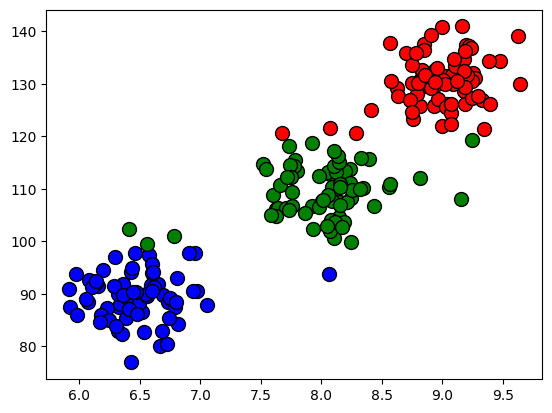

In [10]:
plt.scatter(X[y_mean == 0,0], X[y_mean == 0,1 ], color = 'red', edgecolors='black', s=100)
plt.scatter(X[y_mean == 1,0], X[y_mean == 1,1 ], color = 'blue', edgecolors='black', s=100)
plt.scatter(X[y_mean == 2,0], X[y_mean == 2,1 ], color = 'green', edgecolors='black', s=100)

In [11]:
dataset2 = pd.read_csv('/content/students_cgpa_iq.csv')

In [12]:
dataset2.head()

,CGPA,IQ,Projects
0,3.2,85,2
1,3.1,88,1
2,3.3,82,3
3,3.0,87,2
4,3.4,84,1


In [40]:
Y = dataset2.iloc[:,[0,1,2]].values

In [42]:
px.scatter_3d(dataset2,x='CGPA', y='IQ', z='Projects')

In [44]:
std = StandardScaler()
Y_scaled = std.fit_transform(Y)

In [49]:
wcs1 = []

for i in range(1, 11):
  km = KMeans(i)
  km.fit(Y_scaled)
  wcs1.append(km.inertia_)


In [50]:
wcs1

[240.0000000000001,
 71.25159092626849,
 20.158508483426935,
 9.159634697874113,
 8.15398519870605,
 7.017450880295832,
 5.001953945827432,
 5.743253943545626,
 3.599538069550578,
 3.095408605953572]

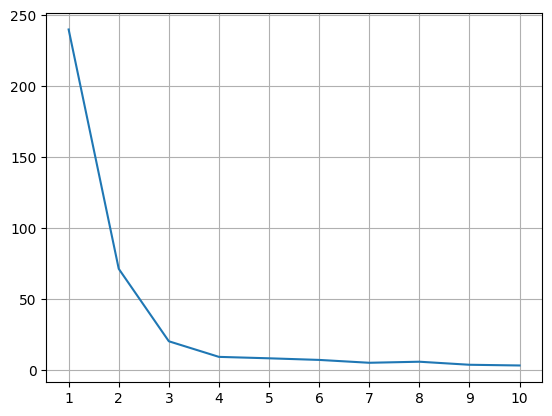

In [53]:
plt.plot(range(1,11), wcs1)
plt.xticks(ticks=range(1,11,1))
plt.grid()

In [35]:
clf1 = KMeans(n_clusters=4)
pred = clf1.fit_predict(Y)

In [32]:
px.scatter_3d(Y, Y[:,0], Y[:,1], Y[:,2], color = pred)